# 📌 Extracción

## Extracción de datos

In [134]:
import pandas as pd
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df=pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [136]:
customerID=df["customerID"]
churn=df["Churn"]
customer_normalizado=pd.json_normalize(df["customer"])
phone_normalizado=pd.json_normalize(df["phone"])
internet_normalizado=pd.json_normalize(df["internet"])
account_normalizado=pd.json_normalize(df["account"])

In [137]:
df_normalizado=pd.concat([customerID,churn,customer_normalizado,phone_normalizado,internet_normalizado,account_normalizado],axis=1)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [138]:
df_normalizado['Charges.Total'].isna().sum()



np.int64(0)

In [139]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [140]:
df_normalizado.loc[df_normalizado['tenure'] == 0, 'Charges.Total'] = 0



In [141]:
df_normalizado['Charges.Total']=df_normalizado['Charges.Total'].astype(float)

In [142]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [143]:
df_normalizado.loc[df_normalizado['tenure'] == 0]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [144]:
df_normalizado['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [145]:
df_normalizado['Churn'] = df_normalizado['Churn'].str.strip()


In [146]:
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', pd.NA)


In [147]:
df_normalizado = df_normalizado.dropna(subset=['Churn'])


In [148]:
df_normalizado['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


#📊 Carga y análisis

In [149]:
df_normalizado.to_csv('df_normalizado_prueba.csv', index=False)

## Analisis descriptivo

In [150]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Distribución de evasión

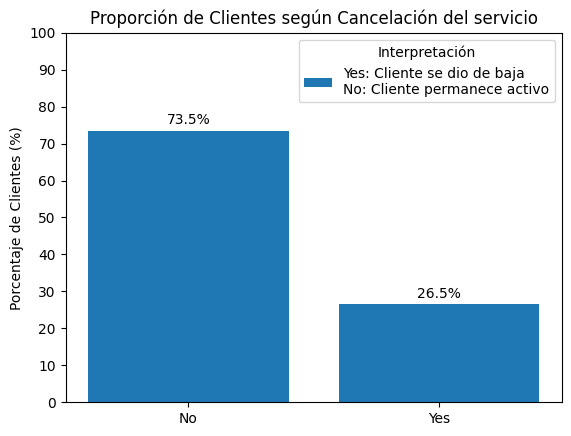

In [151]:
churn_prop = df_normalizado['Churn'].value_counts(normalize=True) * 100

plt.figure()
bars = plt.bar(churn_prop.index, churn_prop.values)

plt.ylabel('Porcentaje de Clientes (%)')
plt.title('Proporción de Clientes según Cancelación del servicio')
plt.legend(
    ['Yes: Cliente se dio de baja\nNo: Cliente permanece activo'],
    title='Interpretación'
)

# Eje Y de 0 a 100
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

# Etiquetas de porcentaje sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()



## Recuento de evasión por variables categóricas

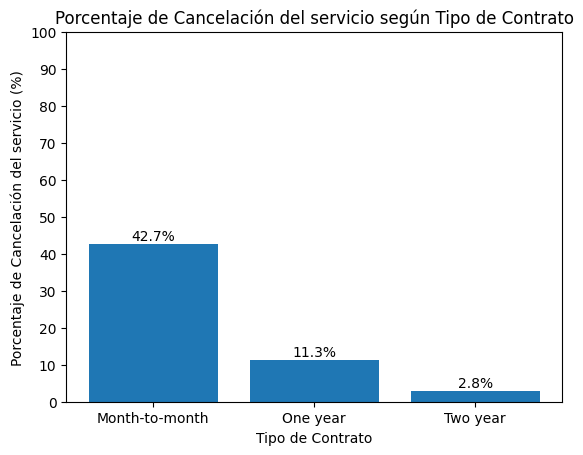

In [152]:
churn_contract = (
    df_normalizado
    .groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

churn_contract = churn_contract[churn_contract['Churn'] == 'Yes']

plt.figure()
plt.bar(churn_contract['Contract'], churn_contract['percentage'])

plt.ylabel('Porcentaje de Cancelación del servicio (%)')
plt.xlabel('Tipo de Contrato')
plt.title('Porcentaje de Cancelación del servicio según Tipo de Contrato')

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

for i, val in enumerate(churn_contract['percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


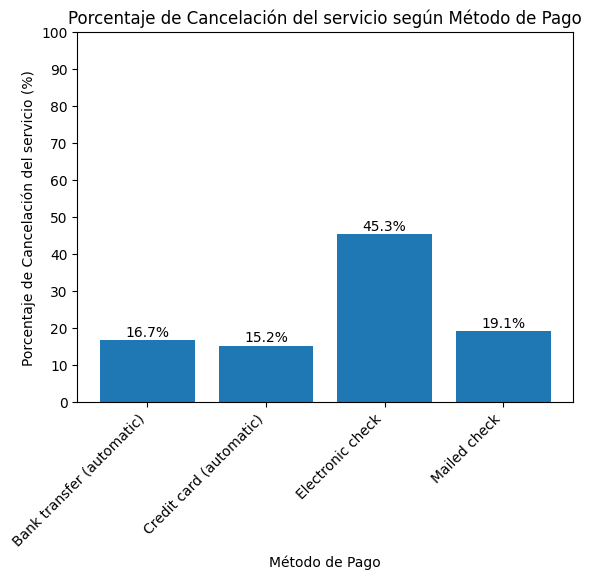

In [153]:
churn_payment = (
    df_normalizado
    .groupby('PaymentMethod')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

churn_payment = churn_payment[churn_payment['Churn'] == 'Yes']

plt.figure()
plt.bar(churn_payment['PaymentMethod'], churn_payment['percentage'])

plt.ylabel('Porcentaje de Cancelación del servicio (%)')
plt.xlabel('Método de Pago')
plt.title('Porcentaje de Cancelación del servicio según Método de Pago')

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.xticks(rotation=45, ha='right')

for i, val in enumerate(churn_payment['percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


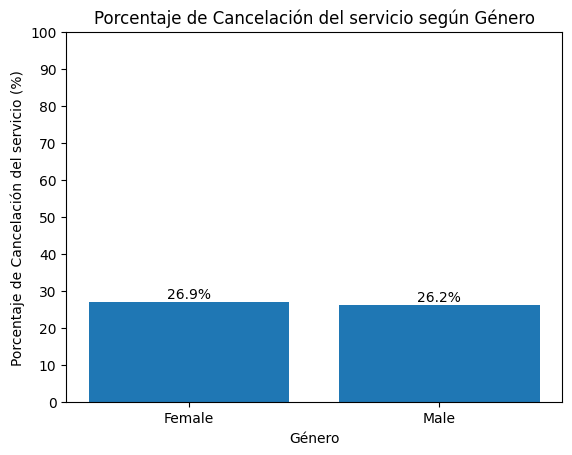

In [154]:
churn_gender = (
    df_normalizado
    .groupby('gender')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

churn_gender = churn_gender[churn_gender['Churn'] == 'Yes']

plt.figure()
plt.bar(churn_gender['gender'], churn_gender['percentage'])

plt.ylabel('Porcentaje de Cancelación del servicio (%)')
plt.xlabel('Género')
plt.title('Porcentaje de Cancelación del servicio según Género')

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

for i, val in enumerate(churn_gender['percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


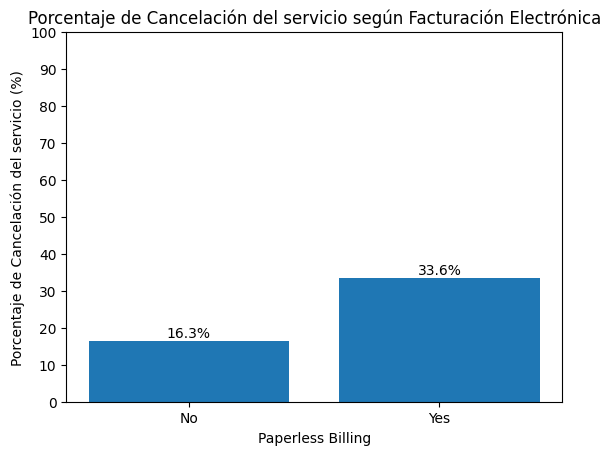

In [155]:
churn_paperless = (
    df_normalizado
    .groupby('PaperlessBilling')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

churn_paperless = churn_paperless[churn_paperless['Churn'] == 'Yes']

plt.figure()
plt.bar(churn_paperless['PaperlessBilling'], churn_paperless['percentage'])

plt.ylabel('Porcentaje de Cancelación del servicio (%)')
plt.xlabel('Paperless Billing')
plt.title('Porcentaje de Cancelación del servicio según Facturación Electrónica')

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

for i, val in enumerate(churn_paperless['percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


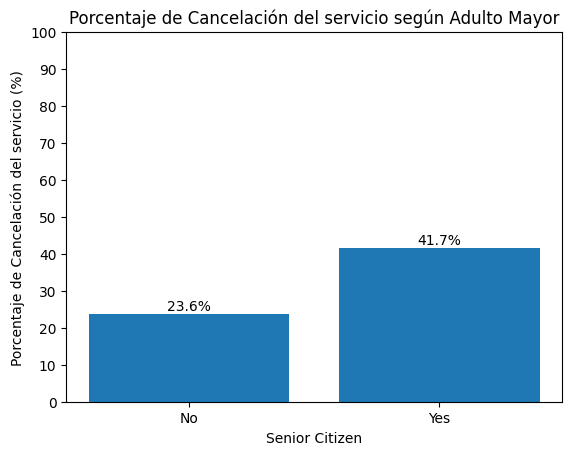

In [156]:
churn_senior = (
    df_normalizado
    .groupby('SeniorCitizen')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

churn_senior = churn_senior[churn_senior['Churn'] == 'Yes']

plt.figure()
plt.bar(['No', 'Yes'], churn_senior['percentage'])

plt.ylabel('Porcentaje de Cancelación del servicio (%)')
plt.xlabel('Senior Citizen')
plt.title('Porcentaje de Cancelación del servicio según Adulto Mayor')

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

for i, val in enumerate(churn_senior['percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


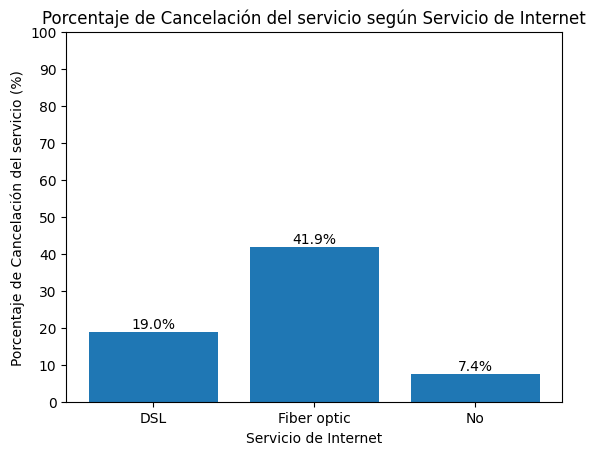

In [157]:
churn_internet = (
    df_normalizado
    .groupby('InternetService')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

churn_internet = churn_internet[churn_internet['Churn'] == 'Yes']

plt.figure()
plt.bar(churn_internet['InternetService'], churn_internet['percentage'])

plt.ylabel('Porcentaje de Cancelación del servicio (%)')
plt.xlabel('Servicio de Internet')
plt.title('Porcentaje de Cancelación del servicio según Servicio de Internet')

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

for i, val in enumerate(churn_internet['percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.show()


## Conteo de evasión por variables numéricas

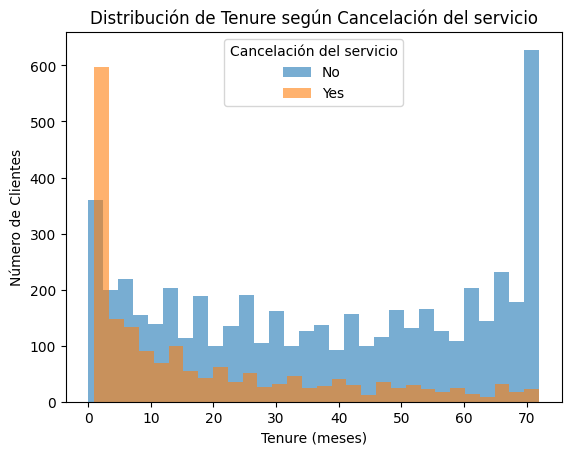

In [158]:
plt.figure()

plt.hist(
    df_normalizado[df_normalizado['Churn'] == 'No']['tenure'],
    bins=30,
    alpha=0.6,
    label='No'
)

plt.hist(
    df_normalizado[df_normalizado['Churn'] == 'Yes']['tenure'],
    bins=30,
    alpha=0.6,
    label='Yes'
)

plt.xlabel('Tenure (meses)')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Tenure según Cancelación del servicio')
plt.legend(title='Cancelación del servicio')

plt.show()


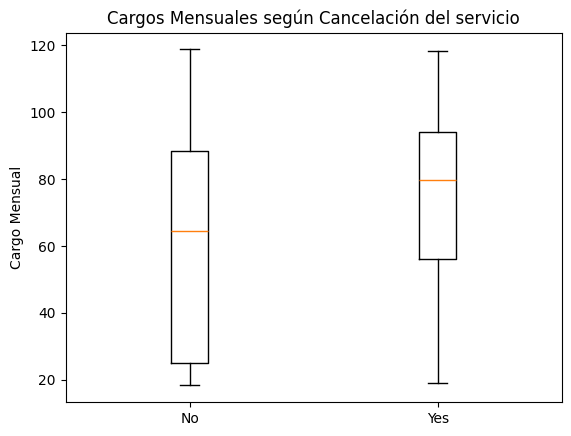

In [159]:
plt.figure()

plt.boxplot(
    [
        df_normalizado[df_normalizado['Churn'] == 'No']['Charges.Monthly'],
        df_normalizado[df_normalizado['Churn'] == 'Yes']['Charges.Monthly']
    ],
    tick_labels=['No', 'Yes']
)

plt.ylabel('Cargo Mensual')
plt.title('Cargos Mensuales según Cancelación del servicio')

plt.show()


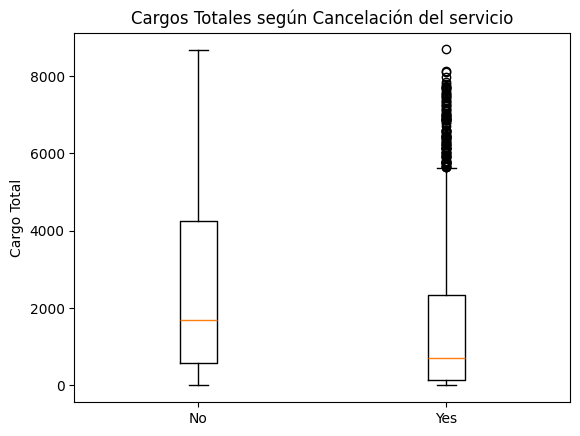

In [160]:
plt.figure()

plt.boxplot(
    [
        df_normalizado[df_normalizado['Churn'] == 'No']['Charges.Total'],
        df_normalizado[df_normalizado['Churn'] == 'Yes']['Charges.Total']
    ],
    tick_labels=['No', 'Yes']
)

plt.ylabel('Cargo Total')
plt.title('Cargos Totales según Cancelación del servicio')

plt.show()


#📄Informe final

### 🔹 Introducción

El propósito principal de este estudio es determinar los elementos que afectan la evasión de clientes (Churn) en la compañía de telecomunicaciones objeto del análisis. Este es un desafío crucial para el negocio porque supone la merma de ganancias, el incremento de los costos de adquisición y una posible reducción en la competitividad en el mercado.

El objetivo es entender patrones de conducta, rasgos compartidos entre los clientes que dejan el servicio y variables fundamentales que permitan prever la rotación, mediante el análisis de datos históricos de clientes. Esto se hace para respaldar la toma de decisiones estratégicas dirigidas a la retención.

---

### 🔹 Limpieza y Tratamiento de Datos

En esta fase, se llevó a cabo la preparación del conjunto de datos con el fin de garantizar la fiabilidad y calidad del análisis. Los pasos fundamentales fueron:

* Importación del conjunto de datos desde el archivo original.
* Análisis de la estructura de los datos, clases de variables y dimensiones del conjunto de datos.

* Detección y manejo de valores inconsistentes o nulos.
* Transformación de variables categóricas a formatos apropiados para el análisis.
* Se normalizaron y ajustaron las variables numéricas cuando fue necesario.
* Supresión de columnas que no eran necesarias o redundantes, ya que no contribuían al análisis.

Estos procesos permitieron obtener un conjunto de datos limpio, estructurado y listo para el análisis exploratorio.

---

### 🔹 Análisis Exploratorio de Datos (EDA)

Se ejecutaron varias visualizaciones y análisis descriptivos en el transcurso del análisis exploratorio para detectar patrones y vínculos significativos. Se engloban los siguientes análisis principales:

* Proporción de clientes que se quedan frente a los que dejan el servicio.
* Comparación de variables contractuales y demográficas en función del estado de Churn.
* Estudio del efecto de los servicios adicionales, el método de pago y la modalidad contractual en la evasión.
* Análisis de variables numéricas, como la antigüedad del cliente y los cargos mensuales.
* Representaciones gráficas (gráficos comparativos, histogramas y barras) que ayudan a reconocer comportamientos poco comunes y tendencias.

Los gráficos obtenidos permiten observar diferencias claras entre los perfiles de clientes que abandonan y los que permanecen, aportando evidencia visual para respaldar los hallazgos.

---

### 🔹 Conclusiones e Insights

El análisis efectuado permitió identificar diversos elementos clave relacionados con la evasión de clientes:

* Los clientes que tienen contratos más flexibles suelen tener tasas de Churn más altas.
* Algunos servicios adicionales están relacionados con una fidelización más alta.
* La relación directa entre el abandono del servicio y los altos cargos mensuales es evidente.
* Los clientes con menos antigüedad tienden más a evadir.
* La conducta del cliente es afectada por el método de pago y el modo en que se factura.
---

### 🔹 Recomendaciones

Las siguientes sugerencias estratégicas se presentan con base en los resultados del análisis:

* Crear programas de retención orientados a los clientes recientes o con poca antigüedad.
* Promover contratos de larga duración con beneficios o descuentos.
* Examinar la estructura de precios para los clientes con cargos mensuales altos.
* Fomentar servicios adicionales que incrementen la apreciación de valor del cliente.
* Implementar modelos predictivos de Churn para detectar tempranamente a los clientes que corren el riesgo de irse.

El uso de estas tácticas puede ayudar a disminuir la evasión de los clientes y a optimizar la estabilidad y la rentabilidad del negocio.
